In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
from Forecast_functions import *

In [8]:
File_path = 'Sales Data.txt'
ProductCodes = [7000158, 7000043, 7000157, 7000022, 7003399]
plants = ['Bangalore New CFA', 'Delhi CFA', 'Zirakpur CFA']
Sales_Channels = ['CP-GT', 'RETAIL', 'CP-NMT']
models = ['arima', 'sarimax', 'rnn']

In [9]:
data = pd.read_csv('Sales Data.txt', parse_dates = [0])

In [10]:
data.head()

,Date,ProductCode,Plant,PlantCode,Sales_Channel,Sales_Qty,Sales_Value
0,2021-07-10,7002030,7011,Hyderabad - CFA,CP-GT,-3,-392.19
1,2021-07-10,7002031,7001,Ahmedabad CFA,CP-GT,-17,-3971.90
2,2021-07-10,7002031,7012,Indore CFA,CP-GT,10,2179.89
3,2021-07-10,7002031,7017,Madurai CFA,CP-GT,2,39.60
4,2021-07-10,7002032,7006,Chennai - CFA,CP-GT,-5,-312.87


In [11]:
df = select_df(File_path, ProductCodes[0], plants[0], Sales_Channels[0], 'D')

c:\Disk D\Forecasting\Python Notebooks\Forecast_functions.py:28: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample(freq).mean()
c:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\scipy\interpolate\_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [12]:
df.head()

,ProductCode,Plant,Sales_Qty,Sales_Value,Dates
Date,,,,,
2020-12-02,7000158.0,7029.0,-75.00000,-7260.280000,2020-12-02
2020-12-03,7000158.0,7029.0,475.00000,44989.300000,2020-12-03
2020-12-04,7000158.0,7029.0,84.00000,8407.150000,2020-12-04
2020-12-05,7000158.0,7029.0,200.00000,19769.990000,2020-12-05
2020-12-06,7000158.0,7029.0,232.26985,22706.384254,2020-12-06


ACF is for MA - q, PACF is for AR - p and Trend is for d - p, d, q


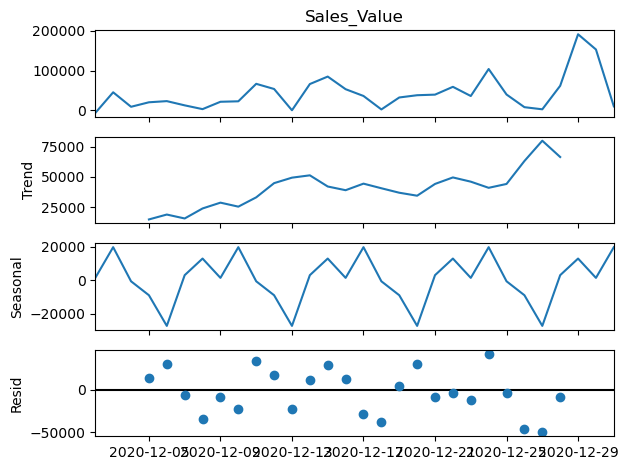

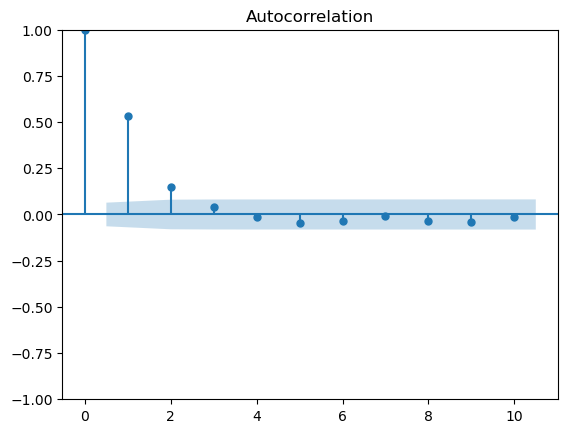

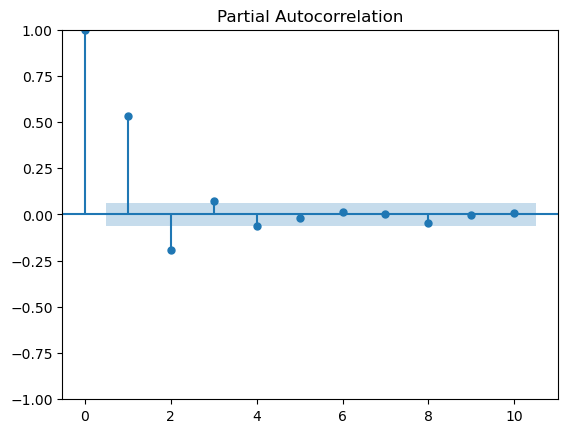

In [13]:
orders(df['Sales_Value'], lags = 10, duration=30)

In [14]:
df['Lag7'] = differencing(df['Sales_Value'], lag=7)

In [15]:
df['Lag7'].iloc[7:]

Date
2020-12-09     28329.290000
2020-12-10    -22748.070000
2020-12-11     57974.590000
2020-12-12     33599.310000
2020-12-13    -23115.274254
                  ...      
2023-06-24     39010.050000
2023-06-25    172888.041279
2023-06-26    230745.510000
2023-06-27    105931.430000
2023-06-28    258101.176153
Freq: D, Name: Lag7, Length: 932, dtype: float64

In [16]:
arima_1 = arima(df['Lag7'].iloc[7:], p = 2, d = 0, q = 3, summary=True)

c:\Users\FQ467WA\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                   Lag7   No. Observations:                  932
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -12270.681
Date:                Tue, 22 Aug 2023   AIC                          24555.362
Time:                        17:52:51   BIC                          24589.224
Sample:                    12-09-2020   HQIC                         24568.276
                         - 06-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        721.9713    707.550      1.020      0.308    -664.801    2108.744
ar.L1          1.6834      0.053     31.974      0.000       1.580       1.787
ar.L2         -0.7685      0.045    -16.923      0.0

In [17]:
tr, ts = train_test_split(df['Lag7'].iloc[7:], train_size=0.8)

In [18]:
ts

Date
2022-12-24    -20706.800000
2022-12-25      6674.426821
2022-12-26      8773.610000
2022-12-27    -58830.490000
2022-12-28    360256.750000
                  ...      
2023-06-24     39010.050000
2023-06-25    172888.041279
2023-06-26    230745.510000
2023-06-27    105931.430000
2023-06-28    258101.176153
Freq: D, Name: Lag7, Length: 187, dtype: float64